### Apple Inc. Tick Data

In [75]:
import pandas as pd
import numpy as np
from FinancialMachineLearning.features.microstructure import *

In [76]:
apple = pd.read_csv('../../Data/AAPL_Tick.csv')

In [77]:
apple.head()

<TICKER>  <PER>    <DATE>  <TIME>  <LAST>  <VOL>
0  US1.AAPL      0  20230403   93000  164.27    100
1  US1.AAPL      0  20230403   93000  164.26    100
2  US1.AAPL      0  20230403   93000  164.28    200
3  US1.AAPL      0  20230403   93000  164.27    119
4  US1.AAPL      0  20230403   93000  164.27    100

In [78]:
apple.columns = ['ticker','per','date','time','price','volume']

In [79]:
apple['side'] = tick_rule(apple.price)

In [80]:
apple[['date','time']] = apple[['date','time']].astype(str)

In [81]:
for i in apple['time'].index:
    if len(apple['time'][i]) == 5:
        apple.loc[i, 'time'] = '0' + apple['time'][i]

In [82]:
apple.head()

ticker  per      date    time   price  volume  side
0  US1.AAPL    0  20230403  093000  164.27     100   1.0
1  US1.AAPL    0  20230403  093000  164.26     100  -1.0
2  US1.AAPL    0  20230403  093000  164.28     200   1.0
3  US1.AAPL    0  20230403  093000  164.27     119  -1.0
4  US1.AAPL    0  20230403  093000  164.27     100  -1.0

In [83]:
apple.index = apple['date'] + apple['time']

In [85]:
apple.index = pd.to_datetime(apple.index)

In [86]:
apple['sidevol'] = apple['volume'] * apple['side']

In [87]:
new_apple = pd.DataFrame()
new_apple = pd.concat([apple.price.groupby(apple.index).first(),
                       apple.price.groupby(apple.index).max(),
                       apple.price.groupby(apple.index).min(),
                       apple.price.groupby(apple.index).last(),
                       apple.volume.groupby(apple.index).sum(),
                       apple.sidevol[apple.sidevol > 0].groupby(apple.sidevol[apple.sidevol > 0].index).sum(),
                       np.abs(apple.sidevol[apple.sidevol < 0].groupby(apple.sidevol[apple.sidevol < 0].index).sum())], axis = 1)
new_apple.columns = ['open','high','low','close','volume','sell_volume','buy_volume']

In [88]:
new_apple.fillna(0, inplace = True)

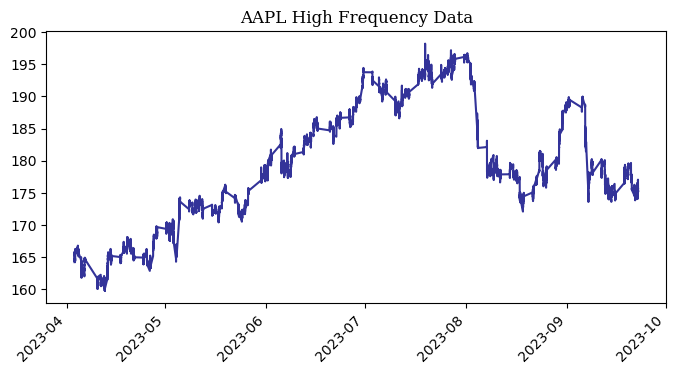

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,4))
new_apple.close.plot(color = 'navy', alpha = 0.8)
plt.xticks(rotation = 45)
plt.title('AAPL High Frequency Data', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [90]:
new_apple

open    high     low   close  volume  sell_volume  \
2023-04-03 09:30:00  164.270  164.28  164.25  164.25     819        300.0   
2023-04-03 09:30:01  164.380  164.38  164.30  164.30     500        200.0   
2023-04-03 09:30:02  164.325  164.35  164.30  164.35    2306       1882.0   
2023-04-03 09:30:03  164.410  164.48  164.41  164.48    1333        975.0   
2023-04-03 09:30:04  164.530  164.55  164.53  164.53     900        700.0   
...                      ...     ...     ...     ...     ...          ...   
2023-09-22 14:14:00  175.210  175.22  175.21  175.22     200        200.0   
2023-09-22 14:14:01  175.220  175.22  175.22  175.22     100        100.0   
2023-09-22 14:14:08  175.200  175.20  175.20  175.20     100          0.0   
2023-09-22 14:14:21  175.220  175.22  175.22  175.22     116        116.0   
2023-09-22 14:14:22  175.250  175.25  175.23  175.23    1260        560.0   

                     buy_volume  
2023-04-03 09:30:00       519.0  
2023-04-03 09:30:01       300.0  
2023-04-03 09:30:02       424.0  
2023-04-03 09:30:03       358.0  
2023-04-03 09:30:04       200.0  
...                         ...  
2023-09-22 14:14:00         0.0  
2023-09-22 14:14:01         0.0  
2023-09-22 14:14:08       100.0  
2023-09-22 14:14:21         0.0  
2023-09-22 14:14:22       700.0  

[805638 rows x 7 columns]